<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E6%A8%B9%E7%8B%80%E6%A8%A1%E5%9E%8B/sklearn%E5%AF%A6%E4%BD%9C2/bookstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%%capture
%pip install wget

In [6]:
import wget
#下載字型
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

#下載csv
wget.download("https://raw.githubusercontent.com/roberthsu2003/machine_learning/refs/heads/main/source_data/Bookstore_Stationery_Dataset.csv")

'Bookstore_Stationery_Dataset.csv'

模型準確率: 0.69

分類報告:
              precision    recall  f1-score   support

          其他       0.25      1.00      0.40         1
        收納用品       0.60      0.50      0.55         6
        書寫工具       1.00      0.82      0.90        11
         紙製品       0.64      0.70      0.67        10
        辦公工具       0.67      0.50      0.57         4

    accuracy                           0.69        32
   macro avg       0.63      0.70      0.62        32
weighted avg       0.75      0.69      0.70        32


混淆矩陣:
[[1 0 0 0 0]
 [0 3 0 3 0]
 [2 0 9 0 0]
 [0 2 0 7 1]
 [1 0 0 1 2]]


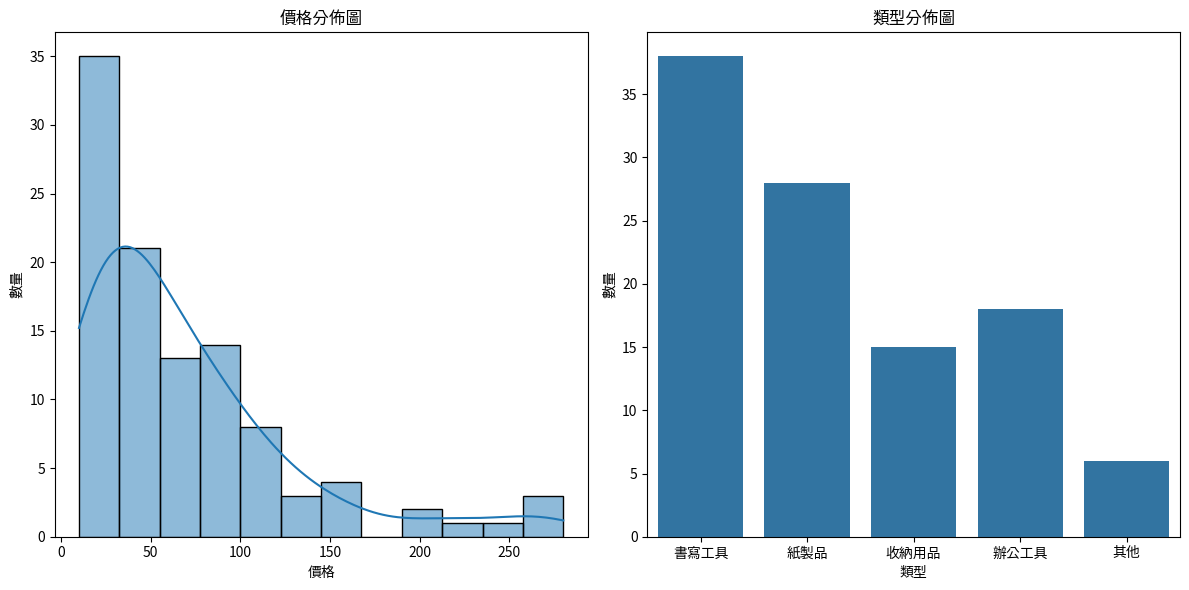

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

# 讀取資料集
data = pd.read_csv('Bookstore_Stationery_Dataset.csv')

# 資料預處理
le = LabelEncoder()
data['尺寸'] = le.fit_transform(data['尺寸'])
data['顏色'] = le.fit_transform(data['顏色'])
data['是否為書寫工具'] = le.fit_transform(data['是否為書寫工具'])

# 選擇特徵和目標變量
X = data[['價格', '尺寸', '顏色', '是否為書寫工具']]
y = data['類型']

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 訓練決策樹模型
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 預測
y_pred = clf.predict(X_test)

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"模型準確率: {accuracy:.2f}")
print("\n分類報告:")
print(classification_report(y_test, y_pred))
print("\n混淆矩陣:")
print(confusion_matrix(y_test, y_pred))

# 資料集圖表分析
plt.figure(figsize=(12, 6))

# 價格分佈
plt.subplot(1, 2, 1)
sns.histplot(data['價格'], kde=True)
plt.title('價格分佈圖')
plt.xlabel('價格')
plt.ylabel('數量')

# 類型分佈
plt.subplot(1, 2, 2)
sns.countplot(x='類型', data=data)
plt.title('類型分佈圖')
plt.xlabel('類型')
plt.ylabel('數量')

plt.tight_layout()
plt.savefig('data_analysis.png')
plt.show()